In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [77]:
path = "/Users/eleonoragonzaga/.cache/kagglehub/datasets/harunshimanto/titanic-solution-for-beginners-guide/versions/1"
data = pd.read_csv(f"{path}/train.csv")

# Data Preprocessing

In [78]:
test = pd.read_csv(f"{path}/test.csv")
print(test.columns)
# Check for missing columns and fill missing values
if 'Embarked' in data.columns:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
if 'Embarked' in test.columns:
    test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [79]:
test = test.drop(columns=['Ticket', "Cabin",  "PassengerId", "Name"])
data = data.drop(columns=['Ticket', "Cabin",  "PassengerId", "Name"])

In [80]:
label_encoder = LabelEncoder()
test["Sex"] = label_encoder.fit_transform(test["Sex"])

In [81]:
X = data.drop(columns=['Survived'])
y = data['Survived']


In [82]:
# 3. Encoding delle variabili categoriche
# Usare Label Encoding per la colonna 'Sex'

data['Sex'] = label_encoder.fit_transform(data['Sex'])

test['Sex'] = label_encoder.fit_transform(test['Sex'])
# Usare One-Hot Encoding per la colonna 'Embarked'

# Encode 'Embarked' only if it exists in both DataFrames
if 'Embarked' in data.columns:
    # Fill missing values if necessary
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    data = pd.get_dummies(data, columns=["Embarked"], drop_first=True)
else:
    print("Warning: 'Embarked' column not found in the data DataFrame.")

if 'Embarked' in test.columns:
    # Fill missing values if necessary
    test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
    test = pd.get_dummies(test, columns=["Embarked"], drop_first=True)
else:
    print("Warning: 'Embarked' column not found in the test DataFrame.")


In [83]:
# Ensure test set has the same columns as data (align columns)
missing_cols = set(data.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0  # Add missing columns with default values (e.g., 0)
test = test[data.columns.drop('Survived')]

In [84]:
# Separate features and target
X = data.drop(columns=['Survived'])
y = data['Survived']


KeyError: "['Survived'] not found in axis"

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# modello

In [121]:

# Creazione del modello di rete neurale
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/Users/eleonoragonzaga/miniconda3/envs/devops/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Addestramento e valutazione del modello

In [122]:
# Compilazione del modello
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [123]:
# Addestramento del modello
history = model.fit(X, y, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6405 - loss: nan - val_accuracy: 0.6425 - val_loss: nan
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6193 - loss: nan - val_accuracy: 0.6425 - val_loss: nan
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5846 - loss: nan - val_accuracy: 0.6425 - val_loss: nan
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6074 - loss: nan - val_accuracy: 0.6425 - val_loss: nan
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5922 - loss: nan - val_accuracy: 0.6425 - val_loss: nan
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5958 - loss: nan - val_accuracy: 0.6425 - val_loss: nan
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6089 - loss: nan - val_accuracy: 0.6425 - val_loss: nan
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6025 - loss: nan - val_accuracy: 0.6425 - val_loss: nan
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0

In [124]:
loss, accuracy = model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.5869 - loss: nan


In [125]:
import matplotlib.pyplot as plt

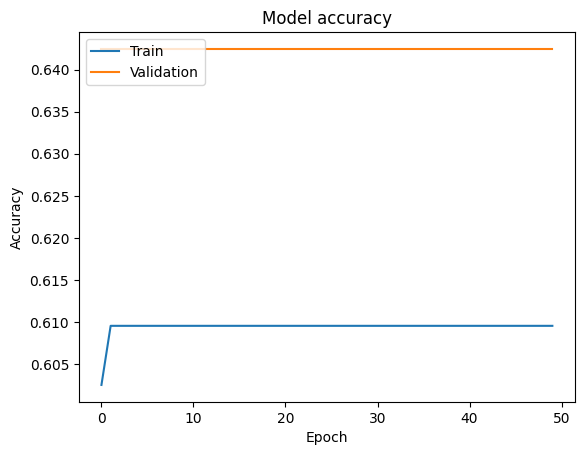

In [126]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

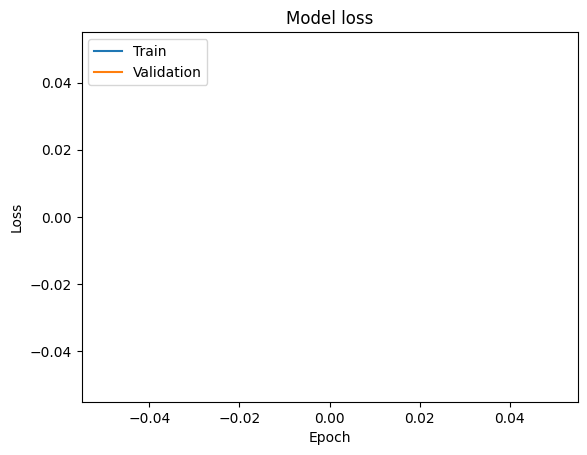

In [127]:
#plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()